### Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

### You are expected to do the following :

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform univariate and multivariate analyses
* Generate a set of insights and recommendations that will help the company in targeting new customers.

### Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

# Import dataset and libraries

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


### Understanding the structure of the data
- Overview of the dataset shape, datatypes - Statistical summary and check for missing values

In [3]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The column 'Fitness' appears as `int64` type, however it can be considered categorical as it is masking the fitness score for the customer. The correct thing to do is to convert that column as categorical in order to perform the correct analysis

In [4]:
# conversion of 'Fitness' to string type
df['Fitness'] = df['Fitness'].astype(object)

In [5]:
# validation of all columns after conversion of 'Fitness'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 12.8+ KB


In [6]:
# Printing the shape of the dataframe

print('Dataframe contains ', df.shape[0], 'rows and', df.shape[1], 'columns')

Dataframe contains  180 rows and 9 columns


In [7]:
# Sanity check for NaN and blank values

print('Dataframe contains ', df.isnull().sum().sum(), 'null values')

Dataframe contains  0 null values


In [8]:
# Overall description of the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,5.0,3.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


- Dataframe contains 180 rows and 9 columns, with no missing values
- There are 4 string columns (object) and 5 integer columns (int64)

Overall, the dataframe is in very good shape with no missing values and the column type seems to be correct for each one 

### Univariate Data Analysis

- Analysis of spread and distribution of every feature in the dataset

### Section 1: Analysis of categorical columns

In [9]:
# list of categorical variables
categorical =  ['Product', 'Gender', 'MaritalStatus', 'Fitness']

# Printing the count of unique categorical in each column
for column in categorical:
    print(df[column].value_counts().sort_values(ascending = False))
    print("-" * 30)

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
------------------------------
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
------------------------------


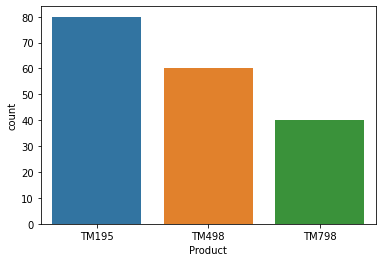

In [10]:
# Graphical distribution of `Product`

sns.countplot(data=df, x='Product');

- The most used product is `TM195` and the least used product is `TM798`

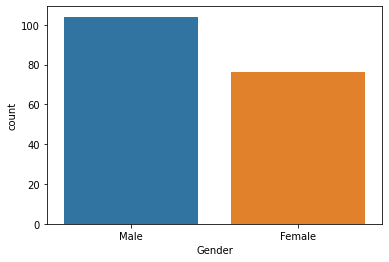

In [11]:
# Graphical distribution of `Gender`

sns.countplot(data=df, x='Gender');

- The most fequent gender is `Male` over `Female`

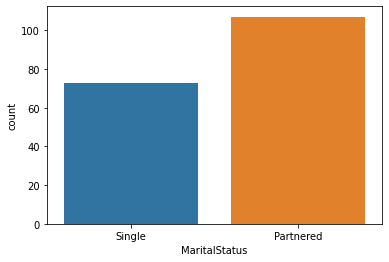

In [12]:
# Graphical distribution of `Product`

sns.countplot(data=df, x='MaritalStatus');

- At 'MaritalStatus' the category `Partnered` outnumber `Single`

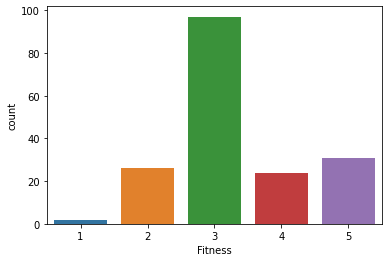

In [13]:
# Graphical distribution of `Fitness`

sns.countplot(data=df, x='Fitness');

- Majority of population at the dataframe is considered as `3` (average fit) wihtin 'Fitness', being `5` (very fit) the second category

In [14]:
# Understanding the proportion in % of unique values in each column

for column in categorical:
    print(df[column].value_counts(normalize=True)*100)
    print("-" * 30)

TM195    44.444444
TM498    33.333333
TM798    22.222222
Name: Product, dtype: float64
------------------------------
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64
------------------------------
Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64
------------------------------
3    53.888889
5    17.222222
2    14.444444
4    13.333333
1     1.111111
Name: Fitness, dtype: float64
------------------------------


- At 'Product', `TM195` doubles `TM798`
- At 'Gender', there are 15.55% more `Male` than `Female`
- At 'MaritalStatus', 59.44% of the population are `Partnered` and 40.55% are `Single`
- 53.88% of the population are categorized as `3` (average fit) being `5` (very fit) the second one with 17.22% 

### Section 2: Analysis of numerical columns

In [15]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

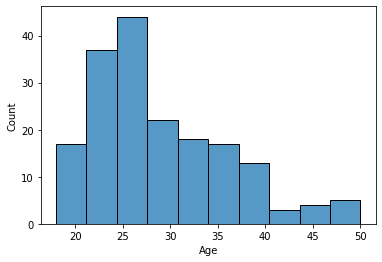

In [16]:
# Histogram of 'Age'

sns.histplot(data=df, x='Age', bins = 10);

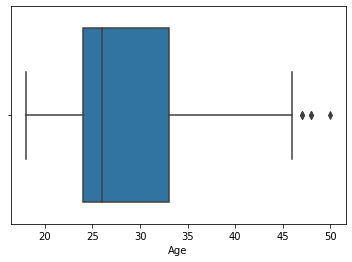

In [17]:
# Boxpolot of 'Age'

sns.boxplot(data = df, x = 'Age');

- This is a right skwed distribution, being the range from the 20 to the 30 years of age the range that concentrates majority of the population 
- There are some outliers over Q3, over `45` years old

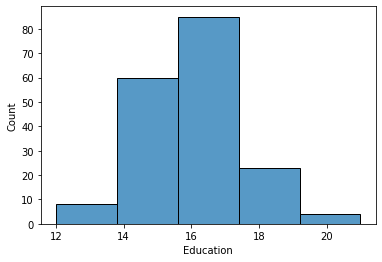

In [18]:
# Histogram of 'Education'

sns.histplot(data=df, x='Education', bins = 5);

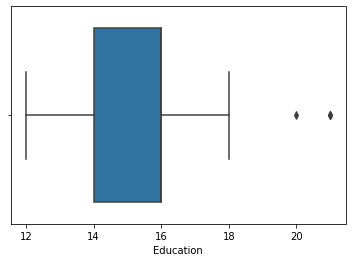

In [19]:
# Boxplot of 'Education'

sns.boxplot(data = df, x = 'Education');

- Most of the population are concentrated around the `16` years of education
- Chart overall looks close to normal, except for the values of `20`, as shown at the boxplot

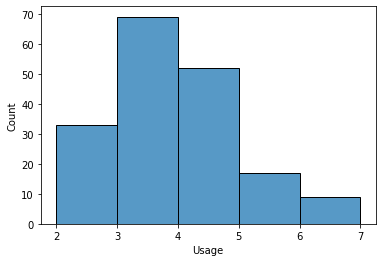

In [20]:
# Histogram of 'Usage'

sns.histplot(data=df, x='Usage', bins = 5);

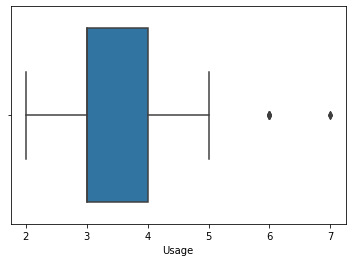

In [21]:
# Boxplot of 'Usage'

sns.boxplot(data = df, x = 'Usage');

- Majority of the population uses `3` times the same threadmill per week
- Chart looks skwed to the right with 2 outliers on `6` and `7`

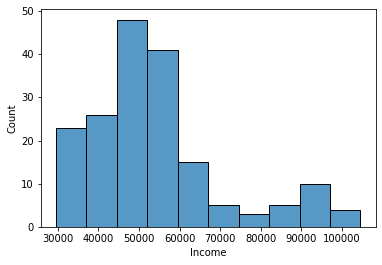

In [22]:
# Histogram of 'Income'

sns.histplot(data=df, x='Income', bins = 10);

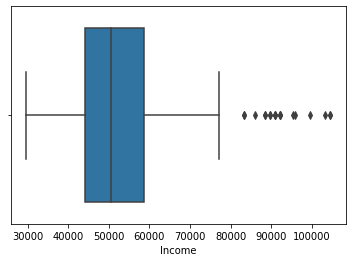

In [23]:
# Boxplot of 'Income'

sns.boxplot(data = df, x = 'Income');

- This is a right skwed distribution of 'Income' being the concentration around the `50000` value with concentration of outliers above the `80000` value

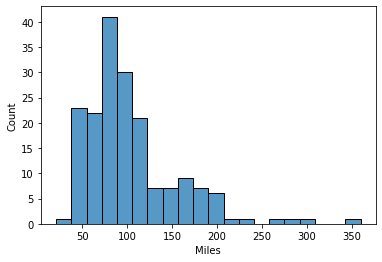

In [24]:
# Histogram of 'Miles'

sns.histplot(data=df, x='Miles', bins = 20);

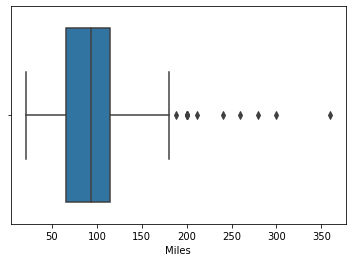

In [25]:
# Boxplot of 'Miles'

sns.boxplot(data = df, x = 'Miles');

- 'Miles' is right skwed distribution, being values around `75` where they concentrate the most
- There are many outliers with a big range over the Q3, going from `200` up to over `350` value

### Multivariate Data Analysis

- Analysis of interaction between features, in the dataset

Let's begin wiht a correlation plot to understand how each numerical value is related to each other

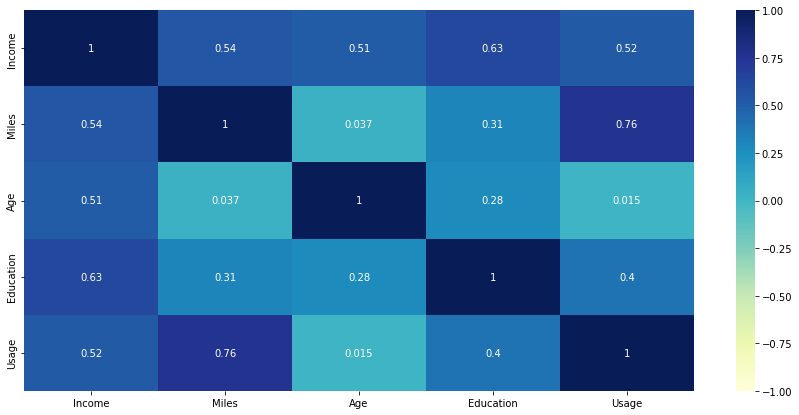

In [26]:
# Correlation matrix of numerical values

plt.figure(figsize=(15,7))
sns.heatmap(data = df[['Income', 'Miles', 'Age', 'Education', 'Usage']].corr(), 
            annot=True, cmap='YlGnBu', vmin = -1, vmax = 1);

- There are some obvious conclusions that can be obtained from the correlation matrix, aside of the evident: all variables are positively correlated. 
- 'Usage' and 'Miles' are highly positively correlated at 76%, followed by 'Education' and 'Income'
- The weakest correlations are between 'Usage' and 'Age', at 1.5% and 'Age' and 'Miles' at 3.7%

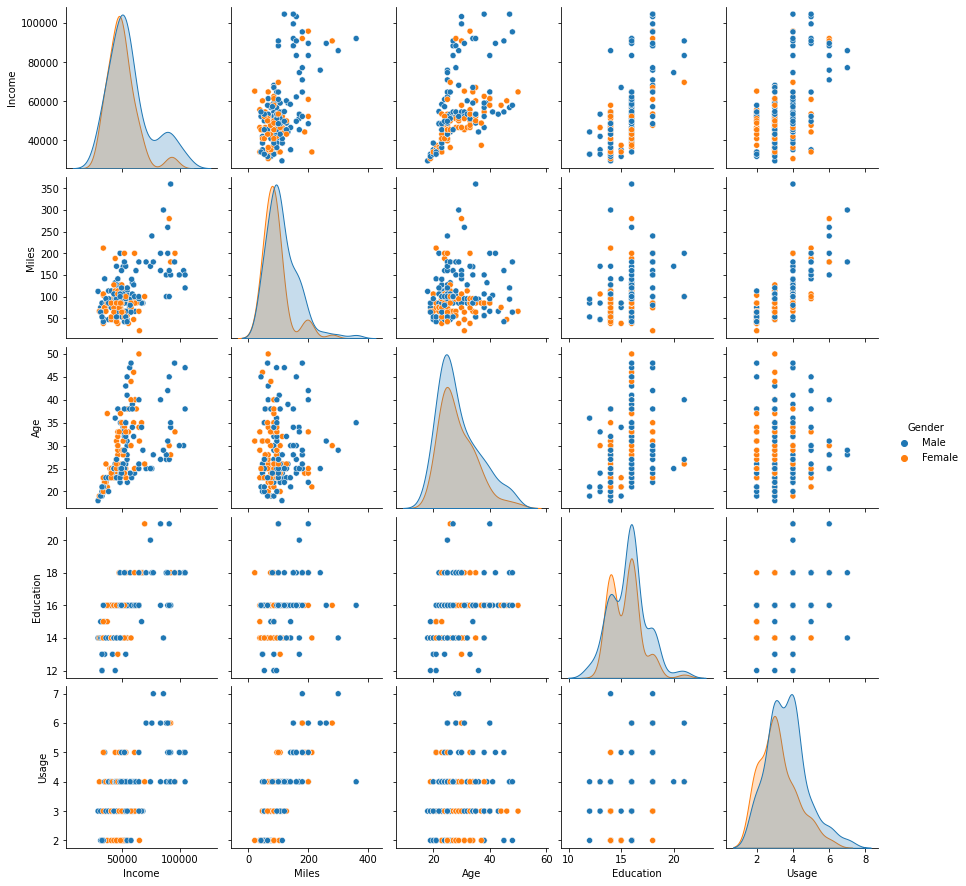

In [27]:
# Pairplot segmentating by 'Gender'

sns.pairplot(data = df, vars = ['Income', 'Miles', 'Age', 'Education', 'Usage'], hue = 'Gender');

- The overlap of all metrics segmentated by 'Gender' is not very significant, with some exceptions where 'Men' seems to show in the upper parts of some charts, like 'Education'-'Usage' or 'Age'-'Miles'

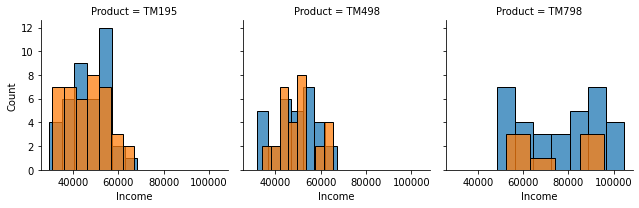

In [28]:
# Analysis of 'Income' by Type of 'Product'

g = sns.FacetGrid(df, col='Product', hue = 'Gender')
g.map(sns.histplot, 'Income');

It seems that product `TM195` is purchased by individuals of lower 'Income' and product `TM798` by individuals of higher 'Income'. However, within the higher 'Income' level, `Men` seems to be the ones that purchase more than `Female`

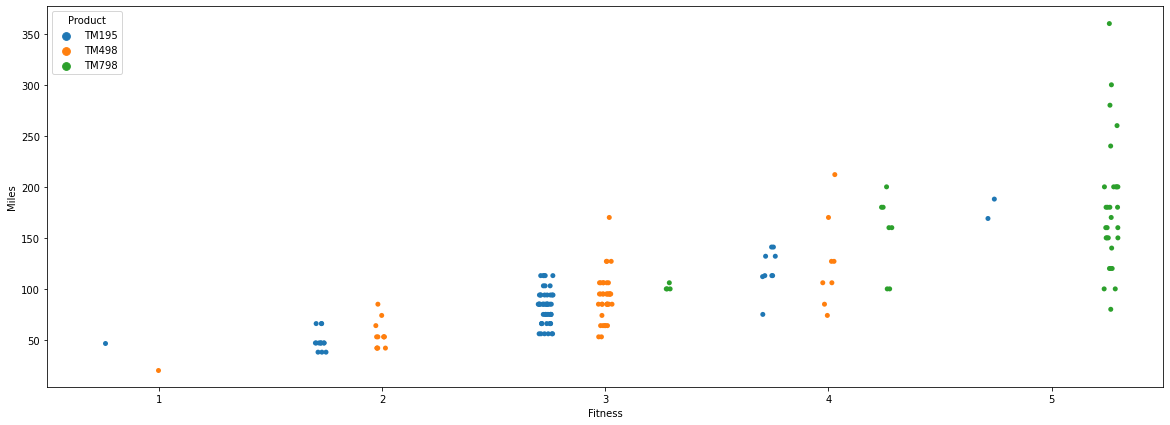

In [29]:
# Analysis of 'Fitnes' level and 'Miles' by 'Product'

plt.figure(figsize=(20,7))
sns.stripplot(data=df, x = 'Fitness', y = 'Miles', hue = 'Product', dodge = True);

- Product type `TM798` is used mostly by individuals with 'Fitness' value of `5`, and the other 2 products are approximately equaly used by individuals with any other 'Fitness' value.
- We can see a positive trend among 'Fitness' and 'Miles', so the higher the 'Fitness' level of the customer, the higher the 'Miles' amount

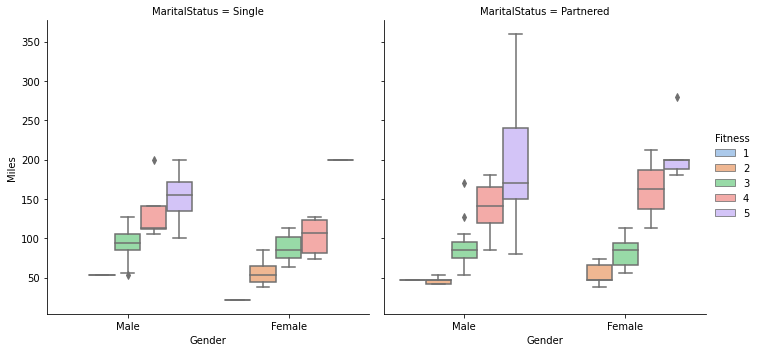

In [30]:
# Analysis of 'Gender' and 'Miles' by 'MaritalStatus' and showing the level of 'Fitness'

sns.catplot(data=df, x = 'Gender', y = 'Miles', hue = 'Fitness', col = 'MaritalStatus', kind='box', palette='pastel');

- Average 'Miles' by `Female` on 'Fitness' value of `5` are higher than `Male`
- `Male` who is `Partnered` are more numerous in 'Fitness' value of `5`
- Average 'Miles' of `Single` both `Male` and `Female` are higher than the same when `Partnered`

### Conclusion and Recommendations
- Conclude with the key insights/observation

- Product `TM798` seems to be an expensive product sold mostly to `Partnered` `Male` that are in very good fit shape (value of `5`)
- 'Age' and 'Education' are not relevant in relation of 'Miles'
- If your customer wants to be in great shape, focus on `Male` or `Female` partnered as they purchase the product `TM798`. Perhaps making a promotion of selling that product for couples would work to improve the business. 
- Perhaps for customers starting or planning to be in shape, 'Fitness' `1` and `2`, the best product to offer cand be `TM195`. Based on the analysis, the majority of the population in this segment are `Male` with 'MaritalStatus' `Single`